In [ ]:
# default_exp simulation

# Wilson Figure

> In this notebook, we reproduce this figure:

In [ ]:
#hide
from nbdev.showdoc import *

![alt text](images/wilson_figure.png "Title")

In [ ]:
import simulation_workshop.simulation as sim
import pandas as pd
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
T = 100 # number of trials
mu = [.2,.8] # reward probabilities
alpha = .2 # learning rate
beta = 4 # inverse temperature
actions, rewards, Cks = sim.simulate_M4ChoiceKernel_v1(T, mu, alpha, beta)
df = pd.DataFrame({'action':actions, 'reward':rewards})

In [ ]:
def analysis_WSLS_v1(df):
    df['last_action'] = df.action.shift(1)
    df['last_reward'] = df.reward.shift(1)
    df['stay'] = (df.action == df.last_action).astype(int)
    output = df.groupby(['last_reward']).stay.mean()
    loseStay = output.loc[0]
    winStay = output.loc[1]
    s = pd.Series([loseStay, winStay])
    return s

## Panel A

### Choice Kernel

In [ ]:
alpha = .1 # learning rate
beta = 3 # inverse temperature
nrep = 110
data = []
for i in range(nrep):
    actions, rewards, Cks = sim.simulate_M4ChoiceKernel_v1(T, mu, alpha, beta)
    df = pd.DataFrame({'action':actions, 'reward':rewards})
    data.append(analysis_WSLS_v1(df))
df = pd.DataFrame(data)
df.columns = ['loseStay','winStay']
ck = df.mean()
ck

loseStay    0.716256
winStay     0.750518
dtype: float64

### Rescorla Wagner

In [ ]:
alpha = .1 # learning rate
beta = 5 # inverse temperature
nrep = 110
data = []
for i in range(nrep):
    actions, rewards, Cks, _ = sim.simulate_M3RescorlaWagner_v1(T, mu, alpha, beta)
    df = pd.DataFrame({'action':actions, 'reward':rewards})
    data.append(analysis_WSLS_v1(df))
df = pd.DataFrame(data)
df.columns = ['loseStay','winStay']
rw = df.mean()
rw

loseStay    0.600911
winStay     0.884549
dtype: float64

### Rough plot 
ToDo: Make nicer.

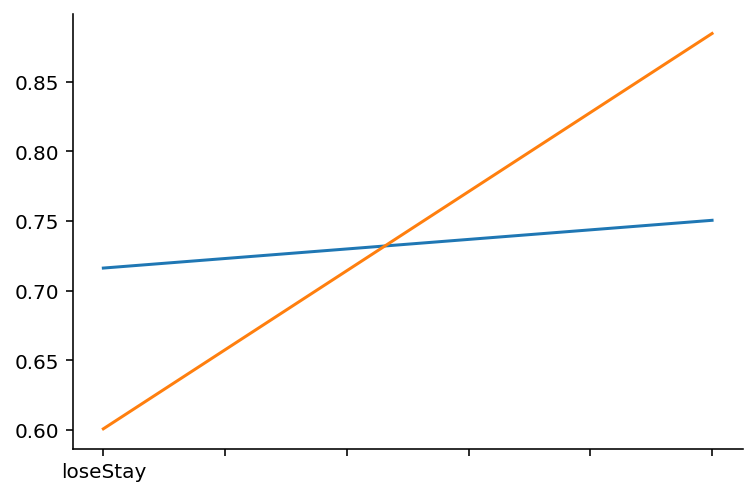

In [ ]:
ax = ck.plot()
ax = rw.plot(ax = ax)
sns.despine()

## Panel B

In [ ]:
import numpy as np
np.arange(.02, 1.02, .02)

array([0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 , 0.22,
       0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42, 0.44,
       0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64, 0.66,
       0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86, 0.88,
       0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ])

In [ ]:
alphas = list(np.arange(.02, 1.02, .02))
print(list(alphas))
betas = [1,2,5,10,20]

TypeError: 'float' object cannot be interpreted as an integer

In [ ]:

%% p(correct) analysis
alphas = [0.02:0.02:1];
betas = [1 2 5 10 20];

for n = 1:1000
    n
    for i = 1:length(alphas)
        for j = 1:length(betas)
            [a, r] = simulate_M3RescorlaWagner_v1(T, mu, alphas(i), betas(j));
            [~,imax] = max(mu);
            correct(i,j,n) = nanmean(a == imax);
            correctEarly(i,j,n) = nanmean(a(1:10) == imax);
            correctLate(i,j,n) = nanmean(a(end-9:end) == imax);
        end
    end
end

%% plot p(correct) behavior
figure(1); 
E = nanmean(correctEarly,3);
L = nanmean(correctLate,3);

figure(1); clf; 
set(gcf, 'Position', [284   498   750   300])
ax = easy_gridOfEqualFigures([0.2 0.1], [0.08 0.14 0.05 0.03]);

axes(ax(1)); hold on;
l = plot([0 1], wsls);
ylim([0 1])
set(l, 'marker', '.', 'markersize', 50, 'linewidth', 3)
leg1 = legend({'M1: random' 'M2: WSLS' 'M3: RW' 'M4: CK' 'M5: RW+CK'}, ...
    'location', 'southeast');
xlabel('previous reward')
% ylabel('probability of staying')
ylabel('p(stay)')
title('stay behavior', 'fontweight', 'normal')
xlim([-0.1 1.1]);
ylim([0 1.04])
set(ax(1), 'xtick', [0 1])
set(leg1, 'fontsize', 12)
set(leg1, 'position', [0.19    0.2133    0.1440    0.2617])
set(ax(1), 'ytick', [0 0.5 1])

axes(ax(2)); hold on;
l1 = plot(alphas, E);
xlabel('learning rate, \alpha')
ylabel('p(correct)')
title('early trials', 'fontweight', 'normal')

for i = 1:length(betas)
    leg{i} = ['\beta = ' num2str(betas(i))];
end
leg2 = legend(l1(end:-1:1), {leg{end:-1:1}});

set([leg1 leg2], 'fontsize', 12)
set(leg2, 'position', [0.6267    0.6453    0.1007    0.2617]);

axes(ax(3)); hold on;
l2 = plot(alphas, L);
xlabel('learning rate, \alpha')
% ylabel('p(correct)')
title('late trials', 'fontweight', 'normal')
for i = 1:length(l1)
    f = (i-1)/(length(l1)-1);
    set([l1(i) l2(i)], 'color', AZred*f + AZblue*(1-f));
end
set([l1 l2], 'linewidth', 3)
set(ax(3), 'yticklabel', [])

set(ax(2:3), 'ylim', [0.5 1.02])
set(ax, 'fontsize', 18, 'tickdir', 'out')
addABCs(ax(1:2), [-0.06 0.09], 32)


%% save resulting figure
saveFigurePdf(gcf, './Figures/Figure2')

    © 2021 GitHub, Inc.

    Terms
    Privacy
    Security
    Status
    Docs
    Contact GitHub
    Pricing
    API
    Training
    Blog
    About

